# Homework 02

**MAE 3120, Spring 2022**

**Caden Gobat**

Note: This Jupyter notebook and its supporting materials are also available in my GitHub repository for this class: [cgobat/MAE-3120](https://github.com/cgobat/MAE-3120).

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

sin = np.sin
cos = np.cos
π = np.pi

## Fourier

$$ f(t) = 6.0 + 1.8\sin(2\pi1.2t) + 1.0\cos(2\pi3.6t) + 2.1\cos(2\pi6.0t) + 3.2\sin(2\pi6.0t) $$

a) The fundamental frequency is $f=1.2$ Hz, as all other frequencies are integer multiples (harmonics) of this.

In [2]:
f = lambda t : 6 + 1.8*sin(2*π*1.2*t) + cos(2*π*3.6*t) + 2.1*cos(2*π*6.0*t) + 3.2*sin(2*π*6.0*t)
ff = 1.2
Tf = 1/ff

b)


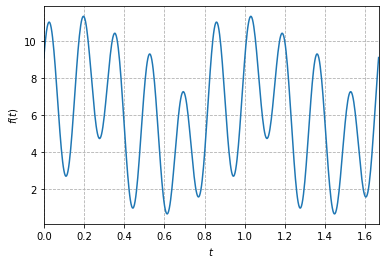

In [3]:
t = np.linspace(0,2*Tf,500)
plt.plot(t,f(t))
plt.ylabel("$f(t)$")
plt.xlabel("$t$")
plt.xlim(t.min(),t.max())
plt.grid(linestyle="--")
print("b)")
plt.show()

c) $f_0 = 1.2$ Hz
\begin{align*}
\omega_1 &= 2\pi\cdot1.2 = 2.4\pi\text{ s}^{-1},\ &A_1 &= 0,\ &B_1 &= 1.8 \\
\omega_2 &= 2\pi\cdot2.4 = 4.8\pi\text{ s}^{-1},\ &A_2 &= 0,\ &B_2 &= 0 \\
\omega_3 &= 2\pi\cdot3.6 = 7.2\pi\text{ s}^{-1},\ &A_3 &= 1.0,\ &B_3 &= 0 \\
\omega_4 &= 2\pi\cdot4.8 = 9.6\pi\text{ s}^{-1},\ &A_4 &= 0,\ &B_4 &= 0 \\
\omega_5 &= 2\pi\cdot6.0 = 12.0\pi\text{ s}^{-1},\ &A_5 &= 2.1,\ &B_5 &= 3.2
\end{align*}

d) $f(t) = \sum_{n=1} C_n e^{in\omega_0 t}$, where $C_n = A_n-iB_n$. Therefore,
\begin{align*}
C_1 &= -1.8i \\
C_2 &= 0 \\
C_3 &= 1 \\
C_4 &= 0 \\
C_5 &= 2.1-3.2i
\end{align*}
Thus, the exponential Fourier series is $$f(t) = 6.0 - 1.8i e^{2\pi i 1.2 t} + e^{2\pi i 3.6 t} + (2.1-3.2i)e^{2\pi i 6.0t}$$

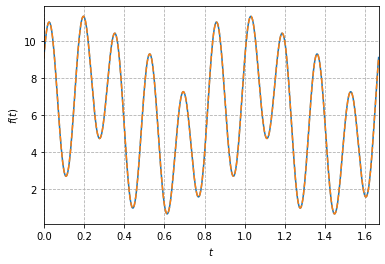

In [4]:
exp_series = 6.0 + 2*(-0.9j*np.exp(2j*π*1.2*t) + 0.5*np.exp(2j*π*3.6*t) + (1.05-1.6j)*np.exp(2j*π*6.0*t))
plt.plot(t, exp_series.real)
plt.plot(t,f(t),"--")
plt.ylabel("$f(t)$")
plt.xlabel("$t$")
plt.xlim(t.min(),t.max())
plt.grid(linestyle="--")
plt.show()

## Voltage

Frequency $f_1 = 400$ Hz, amplitude $A_1 = 2.00$ V, phase $\varphi = 0$

Frequency $f_2 = 800$ Hz, amplitude $A_2 = 1.50$ V, phase $\varphi = \pi/4$

a) The signal can be written as $2.00\sin(2\pi 400 t) + 1.50\sin(2\pi 800t + \pi/4)$

In [5]:
f1 = 400 # Hz
A1 = 2.00 # V
φ1 = 0 # rad
f2 = 800 # Hz
A2 = 1.50 # V
φ2 = π/4 # rad

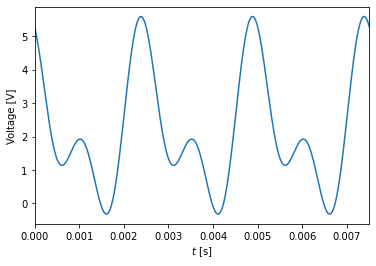

In [6]:
t = np.linspace(0,3/400,300)
y1 = A1*cos(2*π*f1*t + φ1)
y2 = A2*cos(2*π*f2*t + φ2)
plt.plot(t,2.2+y1+y2)
plt.xlabel("$t$ [s]")
plt.ylabel("Voltage [V]")
plt.xlim(t.min(),t.max())
plt.show()

b) The frequencies and amplitudes associated with the signal can be represented by the series $2.00\cos(2\pi 400 t) + 1.50\cos(2\pi 800t)$, which has $f_1=400$ Hz, $A_1 = 2.00$, $f_2 = 800$ Hz, $A_2 = 1.50$. This is essentially the same as the formula in (a), just without any phase information.

c) The above series is equivalent to $2.00 e^{2\pi i 400 t} + 1.50 e^{2\pi i 800t}$

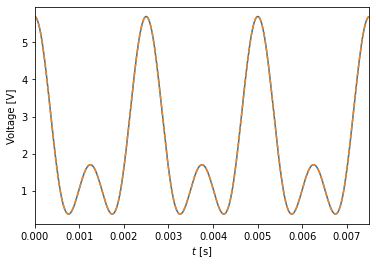

In [7]:
plt.plot(t,2.2 + A1*cos(2*π*f1*t) + A2*cos(2*π*f2*t))
plt.plot(t,2.2 + np.real(A1*np.exp(2j*π*f1*t) + A2*np.exp(2j*π*f2*t)),"--")
plt.xlabel("$t$ [s]")
plt.ylabel("Voltage [V]")
plt.xlim(t.min(),t.max())
plt.show()

## Step

a)


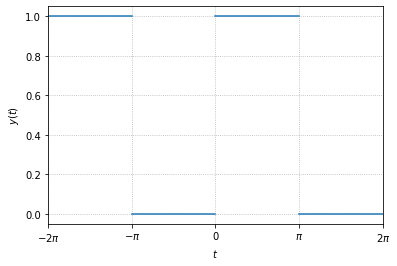

In [8]:
plt.plot([-2*π,-π],[1,1],color="tab:blue")
plt.plot([-π,0],[0,0],color="tab:blue")
plt.plot([0,π],[1,1],color="tab:blue")
plt.plot([π,2*π],[0,0],color="tab:blue")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("a)")
plt.show()

b) As it stands, the function is neither even nor odd (no symmetry about $x=0$ or $y=x$. If we neglect the constant offset and center the function vertically about $y=0$, the function is odd. This implies it will be a sum of $\sin$ functions, with all coefficients associated with $\cos$ terms being $0$.

c) $A_0 = \frac{1}{2}$ because the function's amplitude is 50\% of that of a regular trigonometric function (peak-to-peak difference is 1, rather than 2), so to shift it up to its current location instead of being centered around $y=0$, we need only add $1/2$.

In [9]:
x = np.linspace(-2*π,2*π,628)
s = np.zeros_like(x)
b = [0.5] # first term, constant offset
for n in range(1,100): # calculate out to high n for use later
    bn = (1/π)*(1-cos(n*π))/n # result of the integral over the period
    b.append(bn)

d)


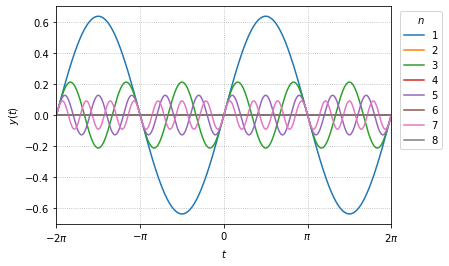

In [10]:
for n in range(1,9):
    plt.plot(x,b[n]*sin(n*x),label=n)
plt.legend(loc="upper left",bbox_to_anchor=(1.01,1),title="$n$")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("d)")
plt.show()

e)


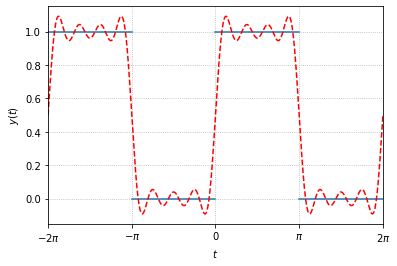

In [11]:
plt.plot([-2*π,-π],[1,1],color="tab:blue")
plt.plot([-π,0],[0,0],color="tab:blue")
plt.plot([0,π],[1,1],color="tab:blue")
plt.plot([π,2*π],[0,0],color="tab:blue")
s = b[0]+np.sum([b[n]*sin(n*x) for n in range(1,9)],axis=0) # first 8 harmonics only
plt.plot(x,s,"r--")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("e)")
plt.show()

f) n_max = 100


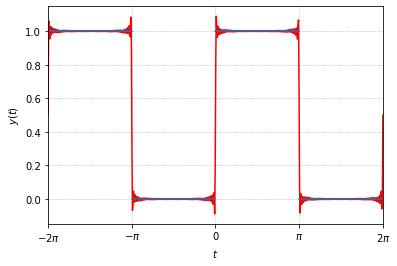

In [12]:
s = b[0]+np.sum([b[n]*sin(n*x) for n in range(1,100)],axis=0)
plt.plot(x,s,"r")
plt.plot([-2*π,-π],[1,1],color="tab:blue")
plt.plot([-π,0],[0,0],color="tab:blue")
plt.plot([0,π],[1,1],color="tab:blue")
plt.plot([π,2*π],[0,0],color="tab:blue")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("f) n_max = 100")
plt.show()

A theoretically infinite number of harmonics is required to faithfully reconstruct the original curve, but since we have an analytical, closed-form solution for $B_n$, the coefficients for an arbitrarily high number of harmonics can be easily calculated.

## Sampling

$$ y(t) = 0.5 + 0.6366\cos(2\pi t) + 0.5273\cos(10\pi t) − 0.7909\cos(14\pi t) $$

a) There is aliasing of the 5 and 7 Hz harmonics, but not the 1 Hz. The Nyquist limit for a frequency to be picked up by our 4.9 Hz sampling instrument is $4.9\div2=2.45$ Hz, and both of the higher two frequencies here exceed that.

In [13]:
y = lambda t : 0.5 + 0.6366*cos(2*π*1*t) + 0.5273*cos(2*π*5*t) - 0.7909*cos(2*π*7*t)
fs = 4.9 # Hz
N = 2048 # points
window = N/fs
t = np.linspace(0,window,N)

b)


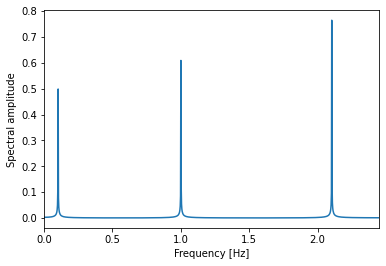

In [14]:
sp = np.fft.fft(y(t))
k = np.arange(N)
frq = k/window # two sided frequency range
frq = frq[1:N//2] # one side frequency range
sp1 = sp[1:N//2]

plt.plot(frq,np.abs(sp1)*2/N)
# plt.hlines([0.6366,0.5273,0.7909],0,8)
# plt.vlines([1,5,7],0,1,"r")
plt.xlim(0,frq.max())
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spectral amplitude")
print("b)")
plt.show()

The 1 Hz component appears as expected, but the 5 Hz component is aliased to $f_a = \left|5-4.9\cdot\text{NINT}\left(\frac{5}{4.9}\right)\right| = 0.1$ Hz. The 7 Hz component is aliased to $f_a = \left|7-4.9\cdot\text{NINT}\left(\frac{7}{4.9}\right)\right| = 2.1$ Hz.

In [15]:
cardinal = lambda yt, timestep, t : sum([yt[n]*sin(π*(t/timestep - n+1e-8))/(t/timestep - n+1e-8) for n in range(len(yt))])/π

c)


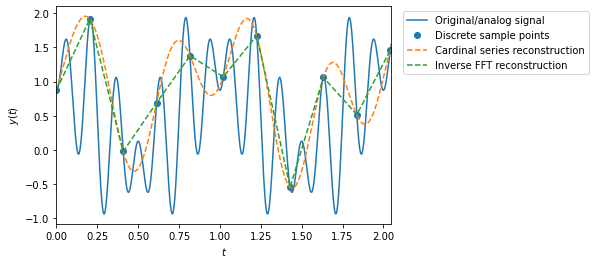

In [16]:
t_cont = np.linspace(0,2.048,2048)
plt.plot(t_cont,y(t_cont),color="tab:blue",label="Original/analog signal")
plt.plot(t,y(t),marker="o",linestyle="",label="Discrete sample points")
plt.plot(t_cont,cardinal(y(t),1/4.9,t_cont),
         "--",label="Cardinal series reconstruction")
plt.plot(t,np.fft.ifft(sp).real,"--",label="Inverse FFT reconstruction")
plt.xlim(0,t_cont.max())
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc="upper left",bbox_to_anchor=(1.02,1))
print("c)")
plt.show()

d) It appears that the Cardinal series is reconstructing a signal made up of lower-frequency components. One could perhaps describe it as dominated only by the more fundamental harmonics.

e) We should sample with a frequency $f_s>2\cdot(7\text{ Hz})$. For instance, 15 Hz should work:

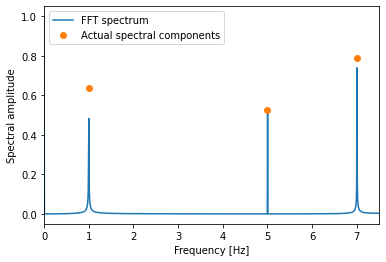

In [17]:
fs = 15 # Hz
N = 2048 # points
window = N/fs
t = np.linspace(0,window,N)
sp = np.fft.fft(y(t))
k = np.arange(N)
frq = k/window # two sided frequency range
frq = frq[:N//2] # one side frequency range
sp1 = sp[:N//2]

plt.plot(frq,np.abs(sp1)*2/N,label="FFT spectrum")
plt.plot([1,5,7],[0.6366,0.5273,0.7909],"o",label="Actual spectral components")
plt.xlim(0,frq.max())
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spectral amplitude")
plt.legend(loc="upper left")
plt.show()

## Aliasing

- Data sampled at 256 Hz: A signal appears at 308 Hz with amplitude 3.0 V and another peak appears at 144 Hz with amplitude 1.0 V.
- Data sampled at 512 Hz: A signal appears at 308 Hz with amplitude 3.0 V. Another signal appears at 112 Hz, with amplitude close to 1.0 V.
- Data sampled at 1,024 Hz: A signal appears 400 Hz, with amplitude close to 1.0 V. Another signal appears at 204 Hz, with amplitude close to 3.0 V.

Clearly, we have aliasing, as we observe different frequency components based only on how fast we sample the signal.

For the moment, let's assume that the frequencies observed at the 1024 Hz sampling rate are unaliased. We will confirm this momentarily. We can then construct a function with these two harmonics and their associated amplitudes, $y(t) = 3\cos(2\pi 204t) + 1\cos(2\pi 400 t)$, we can perform an FFT on it to see what we get out. These spectra are plotted below.

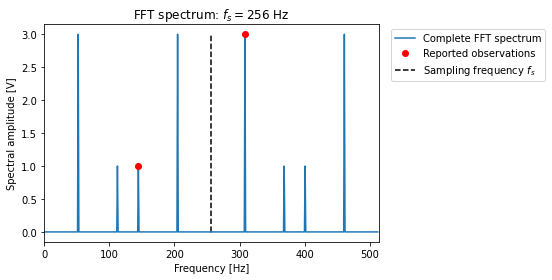

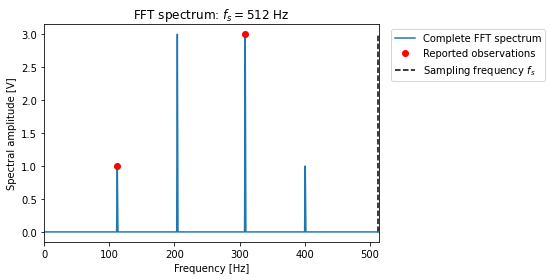

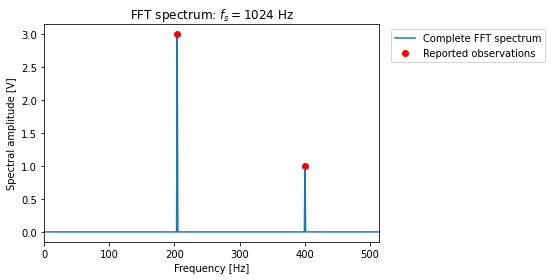

In [18]:
y = lambda t : 3*cos(2*π*204*t) + 1*cos(2*π*400*t)
points = [[(308,144),(3,1)],[(308,112),(3,1)],[(400,204),(1,3)]]

for i,fs in enumerate([256,512,1024]):
    t = np.arange(0,1,1/fs)
    N = len(t)
    k = np.arange(N)
    frq = k/t.max()
    sp = np.fft.fft(y(t))
    plt.plot(frq,np.abs(sp)*2/N,color="tab:blue",label="Complete FFT spectrum")
    plt.plot(frq+frq.max(),np.abs(sp)*2/N,color="tab:blue") # reflected spectrum
    plt.plot(points[i][0],points[i][1],"ro",label="Reported observations")
    if fs<513:
        plt.vlines(fs,0,3,color="k",linestyle="--",label="Sampling frequency $f_s$")
    plt.xlim(0,514)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Spectral amplitude [V]")
    plt.title(f"FFT spectrum: $f_s={fs}$ Hz")
    plt.legend(loc="upper left",bbox_to_anchor=(1.02,1))
    plt.show()

In order to see the 308 Hz component appear when sampling at 256 Hz, we must consider the reflection of the spectrum around the sampling frequency. When we do this, we can see that we will have an apparent harmonic present at 308 Hz, which is a reflection of the spectral peak at ~204 Hz. The 308 Hz peak that appears at $f_s=512$ Hz is a reflection of the 204 Hz component about the folding frequency, 256 Hz. Finally, we see that in the final case of $f_s=1024$ Hz, the spectral components are unaliased and appear as expected in the FFT.

Both 400 Hz and 204 Hz are higher than the Nyquist frequency for $f_s=256$ Hz, which is 128 Hz, so it makes sense that they are aliased in this case. For $f_s=512$ Hz, the 204 Hz meets the Nyquist criterion, and appears in the FFT spectrum as expected, so it is unclear why it was not reported. The 400 Hz signal is aliased, as $400>\frac{512}{2}$. A sampling rate of $f_s=1024$ Hz is enough to adequately capture both components by the Nyquist theorem, and so neither is aliased at this highest sample frequency.